# student data
This notebook analyzes pass/fail data for class

In [2]:
data=[50,5,10,20,50,30,20,4,5,64]
print(data*2)

[50, 5, 10, 20, 50, 30, 20, 4, 5, 64, 50, 5, 10, 20, 50, 30, 20, 4, 5, 64]


In [3]:
import numpy as np

grade=np.array([90,80,70,60,50,40,30,30,40,30])

print(grade*2)

[180 160 140 120 100  80  60  60  80  60]


In [4]:
grade.shape

(10,)

In [5]:
grade.mean()

52.0

In [6]:
study_hr=[5,10,2,6,6,7,2,9,8,9]

student_data=np.array([study_hr,grade])


In [7]:
avg_study=student_data[0].mean()
avg_grade=student_data[1].mean()

print(f'Average study time: {avg_study}\nAverage grade: {avg_grade}')

Average study time: 6.4
Average grade: 52.0


In [8]:
import pandas as pd

df_students = pd.DataFrame({'Name': ['Alice', 'Bob', 'Charlie', 'David'], 
                            'Age': [25, 30, 25, 30],
                            'Studyhr':[5,4,6,7],
                            'Grad':[50,70,50,70]})
df_students

,Name,Age,Studyhr,Grad
0,Alice,25,5,50
1,Bob,30,4,70
2,Charlie,25,6,50
3,David,30,7,70


In [9]:
df_students[df_students.Grad==50]

,Name,Age,Studyhr,Grad
0,Alice,25,5,50
2,Charlie,25,6,50


C:\Users\Administrator\AppData\Local\Temp\ipykernel_12064\811124313.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(df_students.Name,rotation=45)


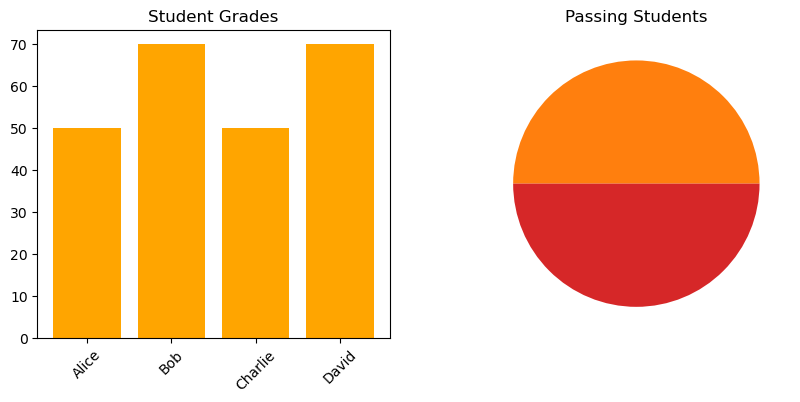

In [32]:
from matplotlib import pyplot as plt

fit, ax =plt.subplots(1,2, figsize=(10,4))

ax[0].bar(x=df_students.Name, height=df_students.Grad, color='orange')

ax[0].set_title('Student Grades')

ax[0].set_xticklabels(df_students.Name,rotation=45)

passes_count = df_students.Grad >= 51
ax[1].pie(passes_count)
ax[1].set_title('Passing Students')
plt.show()


<Axes: xlabel='Name'>

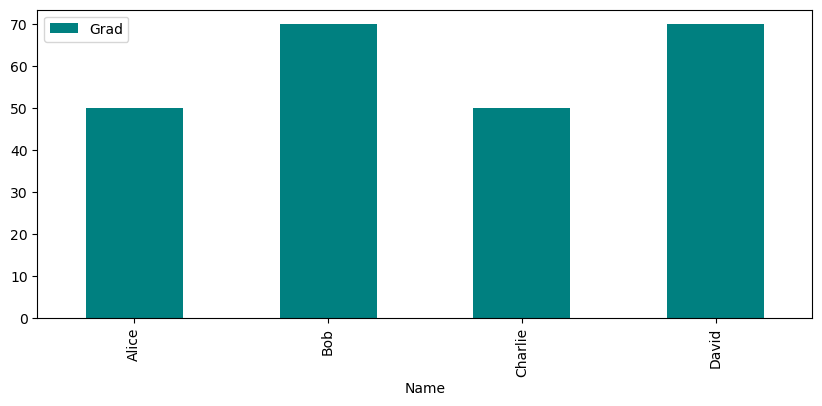

In [35]:
df_students.plot.bar(x='Name', y='Grad', figsize=(10, 4), color='teal')

# CREATING A HISTROGRAM

https://youtu.be/HrRA67O-QXI